<a href="https://colab.research.google.com/github/SoheliPaul/Deep-Learning/blob/main/2348561_Ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
import scipy as sp
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow.keras.applications.inception_v3 as inception_v3

# 1. Data Preprocessing:
- Standardize image sizes and normalize pixel values.
- Apply augmentation techniques to increase data diversity.

In [ ]:
train_path = 'F:/Lab6 Dataset/train_cancer'

train = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,brightness_range=[1.0,2.0],rotation_range=20,validation_split=0.2)
test = ImageDataGenerator(rescale = 1/255,validation_split=0.2)
train_generator = train.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,class_mode='categorical',subset='training')
test_generator = test.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode = 'categorical',shuffle=True)
print("Class indices:")
print(train_generator.class_indices)

Found 216 images belonging to 2 classes.
Found 270 images belonging to 2 classes.
Class indices:
{'benign': 0, 'malignant': 1}


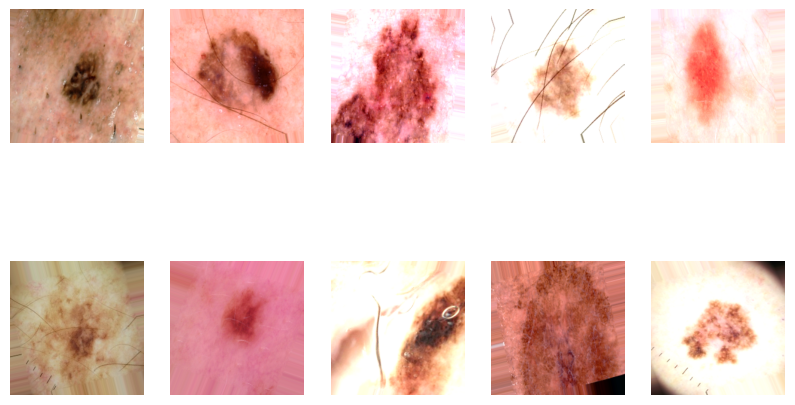

In [ ]:
#Visualize some of the augmented images
x_batch, y_batch = next(train_generator)
fig, axs = plt.subplots(2, 5,figsize=(10,6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_batch[i])
    ax.axis('off')
plt.show()

# 2. Model Architectures:
-VGG16 or VGG19

In [ ]:
from tensorflow.keras.applications import VGG16
model_vgg16 = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

In [ ]:
for layer in model_vgg16.layers:
   layer.trainable=False
   model_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,712,896 (56.13 MB)

 Non-trainable params: 1,792 (7.00 KB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,675,968 (55.98 MB)

 Non-trainable params: 38,720 (151.25 KB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,675,968 (55.98 MB)

 Non-trainable params: 38,720 (151.25 KB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,602,112 (55.70 MB)

 Non-trainable params: 112,576 (439.75 KB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,454,528 (55.14 MB)

 Non-trainable params: 260,160 (1016.25 KB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,454,528 (55.14 MB)

 Non-trainable params: 260,160 (1016.25 KB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,159,360 (54.01 MB)

 Non-trainable params: 555,328 (2.12 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 13,569,280 (51.76 MB)

 Non-trainable params: 1,145,408 (4.37 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 12,979,200 (49.51 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 12,979,200 (49.51 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 11,799,040 (45.01 MB)

 Non-trainable params: 2,915,648 (11.12 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 9,439,232 (36.01 MB)

 Non-trainable params: 5,275,456 (20.12 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 4,719,616 (18.00 MB)

 Non-trainable params: 9,995,072 (38.13 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 2,359,808 (9.00 MB)

 Non-trainable params: 12,354,880 (47.13 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)         │ (None, 224, 224, 3)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, 224, 224, 64)          │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, 224, 224, 64)          │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, 112, 112, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, 112, 112, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, 112, 112, 128)         │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, 56, 56, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, 56, 56, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, 56, 56, 256)           │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, 28, 28, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, 28, 28, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, 28, 28, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, 14, 14, 512)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, 14, 14, 512)           │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, 7, 7, 512)             │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ vgg16 (Functional)                 │ ?                             │  14,714,688 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_5 (Flatten)                │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_10 (Dense)                   │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_5 (Dropout)                │ ?                             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_11 (Dense)                   │ ?                             │ 0 (unbuilt) │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# 3. Training:
- Split the dataset into training, validation, and test sets.
- For VGG models, employ transfer learning by initializing with pre-trained ImageNet weights and fine-tuning only the fully connected layers.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 148s 21s/step - accuracy: 0.8263 - loss: 0.9458 - val_accuracy: 0.8889 - val_loss: 0.3517
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 153s 23s/step - accuracy: 0.8359 - loss: 0.7274 - val_accuracy: 0.8889 - val_loss: 0.2848
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 146s 22s/step - accuracy: 0.9053 - loss: 0.2784 - val_accuracy: 0.9259 - val_loss: 0.2225
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 149s 22s/step - accuracy: 0.9036 - loss: 0.2753 - val_accuracy: 0.9370 - val_loss: 0.2188
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 187s 27s/step - accuracy: 0.9132 - loss: 0.2619 - val_accuracy: 0.9111 - val_loss: 0.2064


# 4. Evaluation:
- Evaluate the trained models on the test set.
- Calculate metrics including accuracy, precision, recall, and F1-score.
- Visualize model predictions and analyze misclassifications.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 78s 8s/step - accuracy: 0.9193 - loss: 0.1857
Test Accuracy: 0.9111111164093018


It's benign


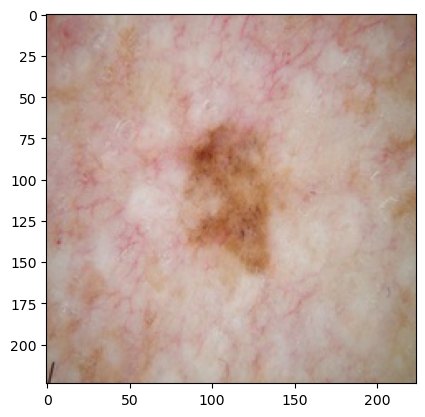

In [ ]:
x_batch, y_batch = next(test_generator)
list = [*range(1, 10, 1)]
a = random.choice(list)
plt.imshow(x_batch[a])
pred = test_generator.labels[a]
if pred == 0:
  print("It's benign")
elif pred == 1:
  print("It's malignant")

In [ ]:
y_pred = np.argmax(model.predict(test_generator), axis=-1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 79s 9s/step


In [ ]:
classes = dict(zip(test_generator.class_indices.values(), test_generator.class_indices.keys()))
Predictions = pd.DataFrame({"Test Labels" : test_generator.labels,
                            "Test Classes" : [classes[i] for i in test_generator.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": test_generator.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(test_generator), axis = 1))]})

9/9 ━━━━━━━━━━━━━━━━━━━━ 87s 10s/step


In [ ]:
Predictions.sample(10)

,Test Labels,Test Classes,Prediction Labels,Prediction Classes,Path,Prediction Probability
83,1,malignant,1,malignant,malignant\151.jpg,0.915260
106,1,malignant,1,malignant,malignant\176.jpg,0.702329
215,1,malignant,1,malignant,malignant\295.jpg,0.959962
15,0,benign,1,malignant,benign\3.jpg,0.824230
52,1,malignant,1,malignant,malignant\120.jpg,0.555836
247,1,malignant,1,malignant,malignant\70.jpg,0.802655
231,1,malignant,1,malignant,malignant\49.jpg,0.921145
72,1,malignant,1,malignant,malignant\141.jpg,0.769279
29,0,benign,1,malignant,benign\7.jpg,0.772950
154,1,malignant,1,malignant,malignant\229.jpg,0.713296


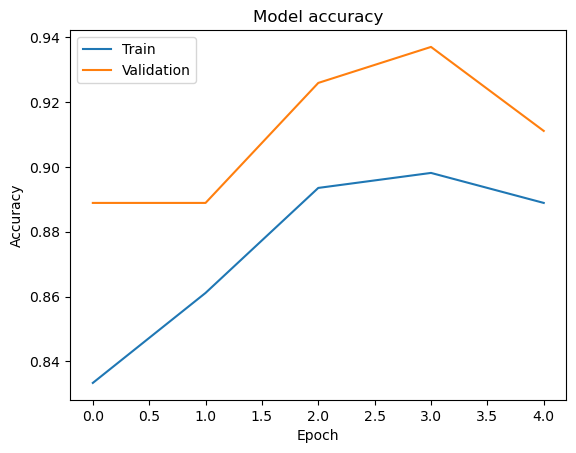

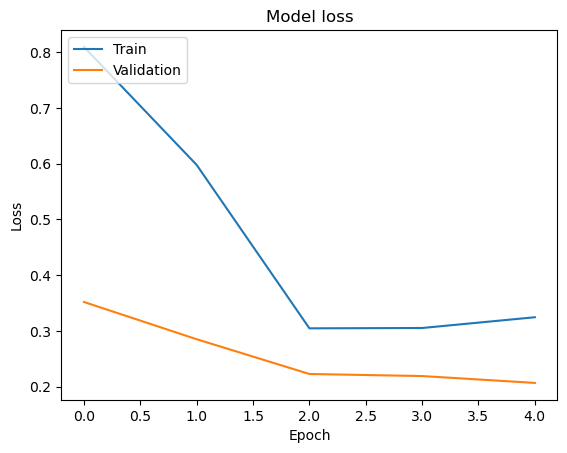

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

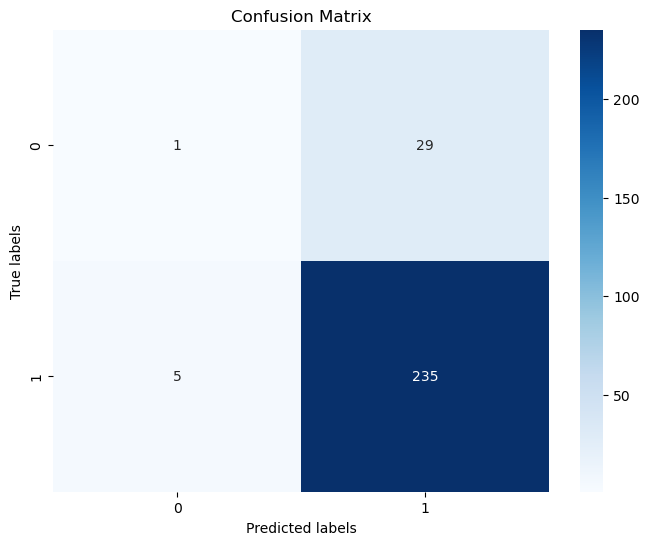

In [ ]:
y_true = test_generator.classes
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.17      0.03      0.06        30
           1       0.89      0.98      0.93       240

    accuracy                           0.87       270
   macro avg       0.53      0.51      0.49       270
weighted avg       0.81      0.87      0.84       270



# 2. Model Architectures:
- Custom CNN: Designed specifically for skin cancer detection, this model comprises:
- Four convolutional layers with increasing filter sizes (32, 64, 128, 256) and ReLU activation.
- Max pooling layers after each convolutional layer.
- Two dense layers with 512 neurons each, followed by a dropout layer (dropout rate: 0.5).
- Output layer with 1 neuron and sigmoid activation for binary classification.

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(256, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='sigmoid'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                 │ (None, 222, 222, 32)          │         896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_20 (MaxPooling2D)    │ (None, 111, 111, 32)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_21 (Conv2D)                 │ (None, 109, 109, 64)          │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_21 (MaxPooling2D)    │ (None, 54, 54, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_22 (Conv2D)                 │ (None, 52, 52, 128)           │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_22 (MaxPooling2D)    │ (None, 26, 26, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_23 (Conv2D)                 │ (None, 24, 24, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_23 (MaxPooling2D)    │ (None, 12, 12, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_11 (Flatten)               │ (None, 36864)                 │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_22 (Dense)                   │ (None, 512)                   │  18,874,880 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_11 (Dropout)               │ (None, 512)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_23 (Dense)                   │ (None, 2)                     │       1,026 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 19,264,322 (73.49 MB)

 Trainable params: 19,264,322 (73.49 MB)

 Non-trainable params: 0 (0.00 B)

# 3. Training:
- Train the custom CNN model from scratch.
- Use appropriate optimization algorithms (e.g., SGD, Adam) and monitor performance on the validation set for early stopping.

In [ ]:
history = model1.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8939 - loss: 0.3571 - val_accuracy: 0.8889 - val_loss: 0.3625
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8901 - loss: 0.3754 - val_accuracy: 0.8889 - val_loss: 0.3661
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.8833 - loss: 0.3819 - val_accuracy: 0.8889 - val_loss: 0.3028
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9244 - loss: 0.2344 - val_accuracy: 0.8889 - val_loss: 0.4507
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8974 - loss: 0.3747 - val_accuracy: 0.8889 - val_loss: 0.3110


# 4. Evaluation:
- Evaluate the trained models on the test set.
- Calculate metrics including accuracy, precision, recall, and F1-score.
- Visualize model predictions and analyze misclassifications.

In [ ]:
test_loss, test_accuracy = model1.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 0.8548 - loss: 0.3893
Test Accuracy: 0.8888888955116272


In [ ]:
y_preds = np.argmax(model1.predict(test_generator), axis=-1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 457ms/step


In [ ]:
classes = dict(zip(test_generator.class_indices.values(), test_generator.class_indices.keys()))
Predictions = pd.DataFrame({"Test Labels" : test_generator.labels,
                            "Test Classes" : [classes[i] for i in test_generator.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_preds],
                            "Path": test_generator.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(test_generator), axis = 1))]})
Predictions.sample(10)

9/9 ━━━━━━━━━━━━━━━━━━━━ 78s 9s/step


,Test Labels,Test Classes,Prediction Labels,Prediction Classes,Path,Prediction Probability
269,1,malignant,1,malignant,malignant\99.jpg,0.855508
52,1,malignant,1,malignant,malignant\120.jpg,0.869940
98,1,malignant,1,malignant,malignant\167.jpg,0.738205
218,1,malignant,1,malignant,malignant\32.jpg,0.762343
2,0,benign,1,malignant,benign\14.jpg,0.645002
142,1,malignant,1,malignant,malignant\218.jpg,0.778859
155,1,malignant,1,malignant,malignant\23.jpg,0.959962
211,1,malignant,1,malignant,malignant\291.jpg,0.876171
261,1,malignant,1,malignant,malignant\89.jpg,0.790474
139,1,malignant,1,malignant,malignant\215.jpg,0.755502


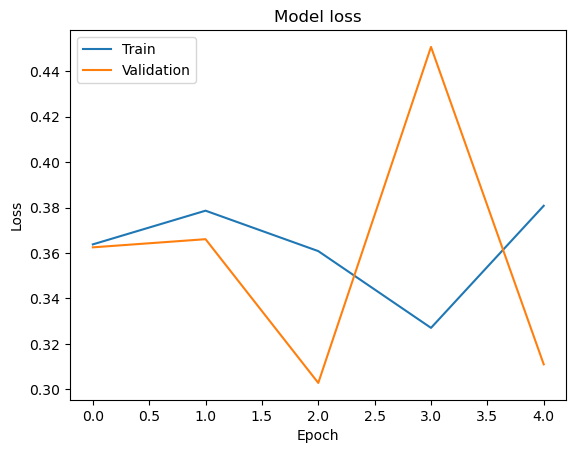

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

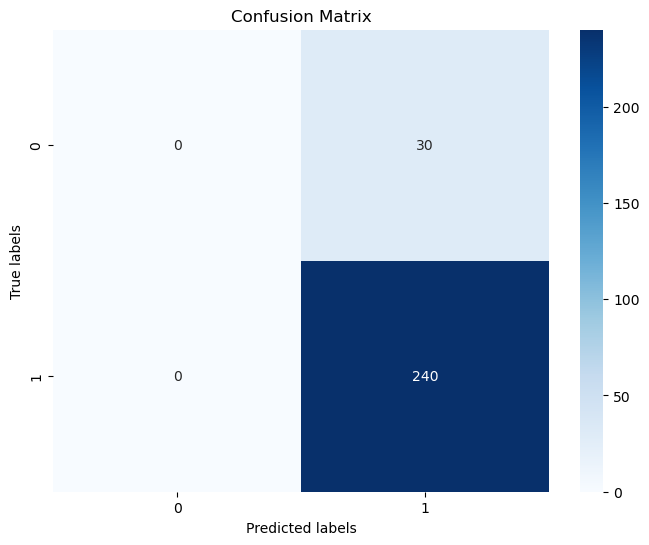

In [ ]:
y_true = test_generator.classes
conf_matrix = confusion_matrix(y_true, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_true,y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.89      1.00      0.94       240

    accuracy                           0.89       270
   macro avg       0.44      0.50      0.47       270
weighted avg       0.79      0.89      0.84       270



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4.Comparison:
● Visualize loss and accuracy curves during training for both architectures to analyze
convergence patterns.
● Compare traditional metrics (accuracy, precision, recall, F1-score,ROC-AUC, specificity)
between VGG and custom CNN models.
● Present ROC curves and confusion matrices to compare classification performance and
error patterns.

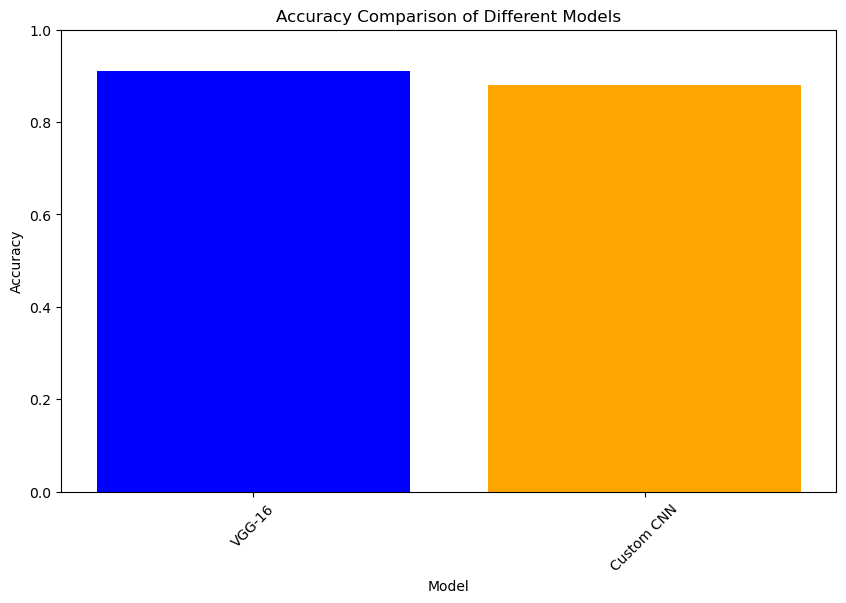

In [ ]:
accuracies = {'VGG-16': 0.91,'Custom CNN': 0.88}

# Plot accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()